# Sentinel Hub Feature Info Service (FIS)

A sample code to demonstrate method of extracting statistical measures of NDVI values based on inputted area of interest on a given time. 

In [1]:
# import libraries
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely.geometry import Polygon

from sentinelhub import FisRequest, BBox, Geometry, CRS, WcsRequest, CustomUrlParam, \
    DataCollection, HistogramType, bbox_to_dimensions
from sentinelhub.time_utils import iso_to_datetime

In [2]:
# sentinel hub configurations
from sentinelhub import SHConfig


INSTANCE_ID = ''  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [3]:
def fis_data_to_dataframe(fis_data):
    """ Creates a DataFrame from list of FIS responses
    """
    COLUMNS = ['channel', 'date', 'min', 'max', 'mean', 'stDev']
    data = []

    for fis_response in fis_data:
        for channel, channel_stats in fis_response.items():
            for stat in channel_stats:
                row = [int(channel[1:]), iso_to_datetime(stat['date'])]

                for column in COLUMNS[2:]:
                    row.append(stat['basicStats'][column])

                data.append(row)

    return pd.DataFrame(data, columns=COLUMNS).sort_values(['channel', 'date'])

## Set area of interest

In [4]:
# uplb_bbox = BBox((121.236520,14.155305,121.248736,14.167150), CRS.WGS84)

makiling_bbox = BBox((121.189990,14.118840,121.232678,14.160235), CRS.WGS84)
time_interval = ('2020-03-01', '2020-05-01')

## Extract statistical measures of NDVI values

In [5]:
ndvi_script = 'return [(B05 - B04) / (B05 + B04)]'

histogram_request = FisRequest(
    data_collection=DataCollection.LANDSAT8,
    layer='TRUE-COLOR-L8',
    geometry_list=[makiling_bbox],
    time=time_interval,
    resolution='100m',
    bins=20,
    histogram_type=HistogramType.EQUIDISTANT,
    custom_url_params={CustomUrlParam.EVALSCRIPT: ndvi_script},
    config=config
)

histogram_data = histogram_request.get_data()

In [6]:
# min, max, mean, stDev, and histogram values per date
histogram_data

[{'C0': [{'date': '2020-04-28',
    'basicStats': {'min': 0.05528613179922104,
     'max': 0.7815964818000793,
     'mean': 0.40351266468855773,
     'stDev': 0.23165467963298067},
    'histogram': {'bins': [{'lowEdge': 0.05528613179922104, 'count': 203.0},
      {'lowEdge': 0.09160164929926395, 'count': 177.0},
      {'lowEdge': 0.12791716679930687, 'count': 152.0},
      {'lowEdge': 0.16423268429934978, 'count': 96.0},
      {'lowEdge': 0.2005482017993927, 'count': 82.0},
      {'lowEdge': 0.23686371929943562, 'count': 88.0},
      {'lowEdge': 0.27317923679947853, 'count': 69.0},
      {'lowEdge': 0.30949475429952145, 'count': 68.0},
      {'lowEdge': 0.34581027179956436, 'count': 64.0},
      {'lowEdge': 0.3821257892996073, 'count': 61.0},
      {'lowEdge': 0.4184413067996502, 'count': 65.0},
      {'lowEdge': 0.4547568242996931, 'count': 79.0},
      {'lowEdge': 0.491072341799736, 'count': 67.0},
      {'lowEdge': 0.5273878592997789, 'count': 59.0},
      {'lowEdge': 0.563703376799

In [7]:
# convert extracted data to pandas dataframe format
makiling = fis_data_to_dataframe(histogram_data)
makiling_sort = makiling.sort_index()
makiling_sort

,channel,date,min,max,mean,stDev
0,0,2020-04-28,0.0552861,0.781596,0.403513,0.231655
1,0,2020-04-20,NaN,NaN,NaN,NaN
2,0,2020-04-12,0.0946962,0.17925,0.145293,0.0164898
3,0,2020-04-04,NaN,NaN,NaN,NaN
4,0,2020-03-27,0.044233,0.849568,0.594856,0.254003
5,0,2020-03-19,NaN,NaN,NaN,NaN
6,0,2020-03-11,0.012678,0.762423,0.183862,0.178659
7,0,2020-03-03,NaN,NaN,NaN,NaN


## Plot distribution of NDVI values 

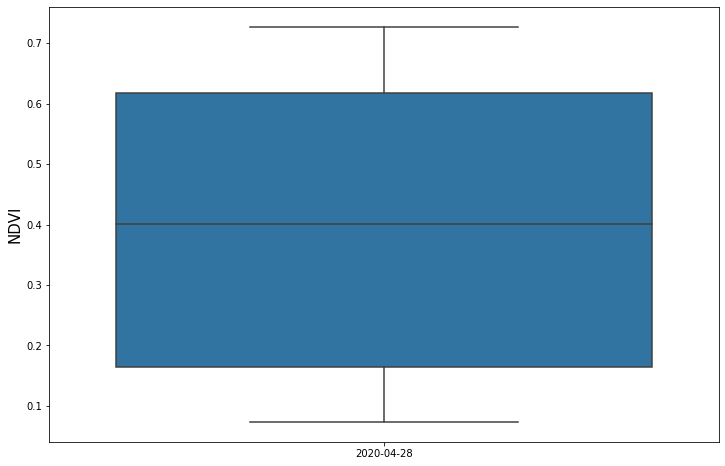

In [8]:
# 2020-04-28
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response['C0'][0]['histogram']['bins']

    counts = [value['count'] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]['lowEdge'] - bins[0]['lowEdge']
    splits = [value['lowEdge'] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, ax=ax)
ax.set(xticklabels=['2020-04-28'])
plt.ylabel('NDVI', fontsize=15);

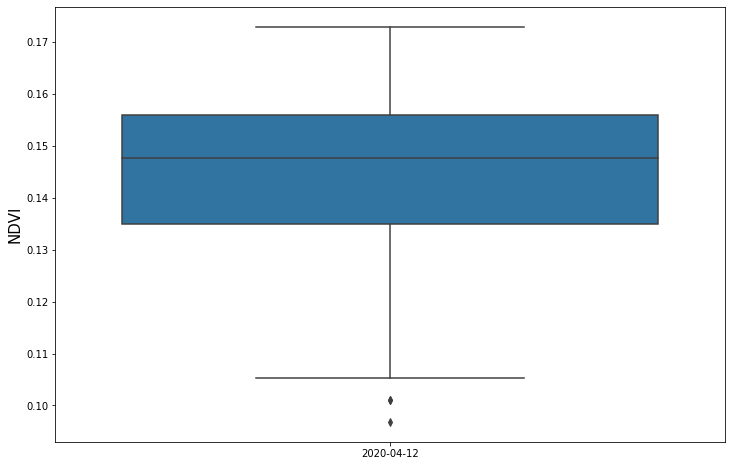

In [9]:
# 2020-04-12
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response['C0'][2]['histogram']['bins']

    counts = [value['count'] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]['lowEdge'] - bins[0]['lowEdge']
    splits = [value['lowEdge'] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, ax=ax)
ax.set(xticklabels=['2020-04-12'])
plt.ylabel('NDVI', fontsize=15);

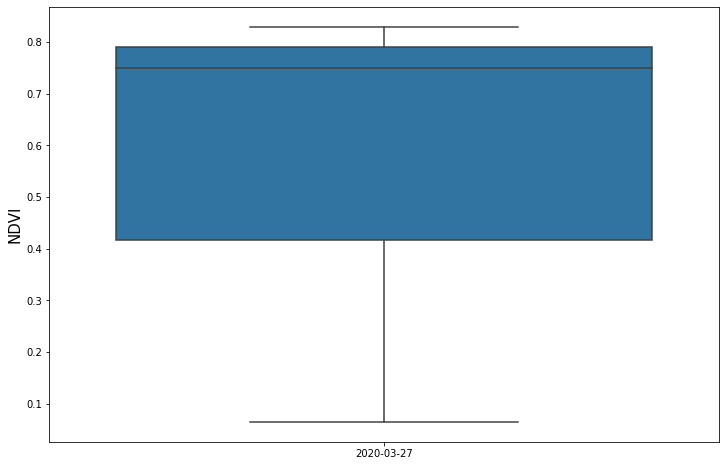

In [10]:
# 2020-03-27
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response['C0'][4]['histogram']['bins']

    counts = [value['count'] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]['lowEdge'] - bins[0]['lowEdge']
    splits = [value['lowEdge'] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, ax=ax)
ax.set(xticklabels=['2020-03-27'])
plt.ylabel('NDVI', fontsize=15);

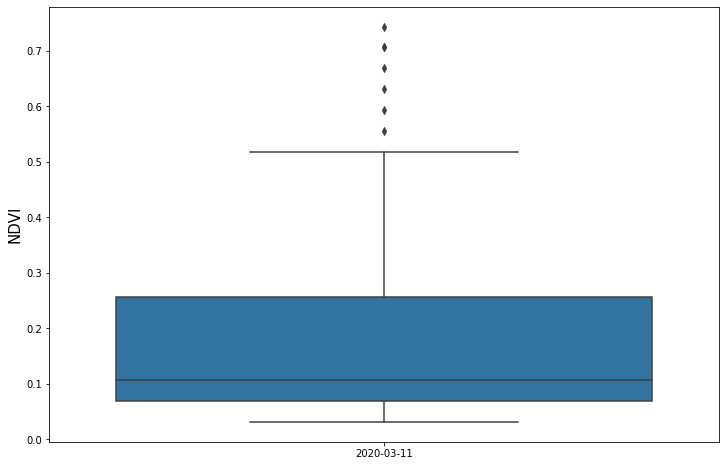

In [11]:
# 2020-03-11
plot_data = []
for idx, fis_response in enumerate(histogram_data):
    bins = fis_response['C0'][6]['histogram']['bins']

    counts = [value['count'] for value in bins]
    total_counts = sum(counts)
    counts = [round(100 * count / total_counts) for count in counts]

    bin_size = bins[1]['lowEdge'] - bins[0]['lowEdge']
    splits = [value['lowEdge'] + bin_size / 2 for value in bins]

    data = []
    for count, split in zip(counts, splits):
        data.extend([split] * count)
    plot_data.append(np.array(data))


fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, ax=ax)
ax.set(xticklabels=['2020-03-11'])
plt.ylabel('NDVI', fontsize=15);